# Problem Statement

The Project is based on Customer segmentation.Customer segmentation is the process of dividing customers into groups based on common characteristics so that companies target each group effectively and appropriately.

The manager of the XYZ mall has approached us with this data where he has tried gathering some details regarding the customers who visit the mall. The given dataset is a simple spreadsheet where you can see columns like customer ID, gender of the customer, age of the customer, the annual income of the customer given to us in thousand dollars and the spending score which ranges from 1 to 100. The gender, age, and annual income was gathered through a feedback survey and the spending score was calculated by the manager on the basis of several factors like how often does the customer visit the mall, how much of amount does he spend on shopping and also on entertainment and food. Based on this, from the manager’s perspective, a good spending score which is close to 100 indicates a good customer and spending score close to 1 indicates a bad customer.

Now the manager has come up to us with this data saying that he has an offer in his mind which he wants to roll out to specific customers by personally calling them. So the manager wants to find out the potential customers inorder to call only those specific customers and roll out the offer to them

You are required to work upon this data and find out the optimum number of segments that can be generated, segment the customers and help the manager with the potential customers.

# Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Reading the DataFrame

In [5]:
df=pd.read_csv(r'C:\Users\HP\SHUBHAM PYTHON\Mall_Customers.csv',index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
print(df.shape)

(200, 4)


In [7]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [8]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [9]:
df.isnull().sum() 

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

As we do not have any Y values we will create our own X & Y

In [10]:
X=df.values[:,[2,3]]

In [11]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

Using the elbow method to find the optimal number of clusters

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


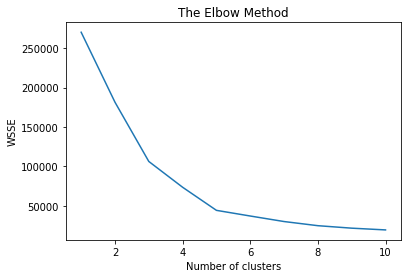

In [12]:
from sklearn.cluster import KMeans

wsse = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_) 
plt.plot(range(1, 11), wsse)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()  

In [13]:
print(wsse)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37271.88623658949, 30273.394312070042, 25022.48500453035, 21881.878507060963, 19669.710998301212]


In [14]:
kmeans = KMeans(n_clusters = 5,random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [15]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [16]:
kmeans.n_iter_

5

In [17]:
df["Clusters"]=Y_pred

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


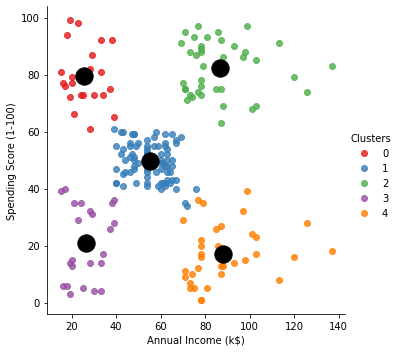

In [19]:
sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, 
           hue='Clusters',palette="Set1")    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
       s = 300, c = 'black')
plt.show()

In [20]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Standard",2:"Target",3:"Sensible",4:"Carefull"})

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [22]:
new_df=df[df["Clusters"]=="Target"]

In [23]:
new_df.shape

(39, 5)

In [24]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,Male,39,69,91,Target
126,Female,31,70,77,Target
128,Male,40,71,95,Target
130,Male,38,71,75,Target
132,Male,39,71,75,Target


In [25]:
new_df.to_excel(r'Feynn_Labs_Project1.xlsx',index=True)